In [1]:
import os
import numpy as np
from pathlib import Path
from itertools import product

from matplotlib import pyplot as plt
from net import GESTURE_NAMES

In [2]:
RESULTS_DIR = Path(r".\experiments")

In [3]:
def plot_confusion_matrix(conf_mats):
    fig, ax = plt.subplots(2, 4, figsize=(30, 10))

    for k, (cm, title) in enumerate(conf_mats):
        i, j = divmod(k, 4)

        size = len(cm)
        ax[i, j].set_title(title)
        ax[i, j].set_xticks([], [])
        ax[i, j].set_yticks(range(len(GESTURE_NAMES)), GESTURE_NAMES)
        ax[i, j].set_xlabel("Predicted")
        ax[i, j].set_ylabel("Actual")

        for x, y in product(range(size), repeat=2):
            ax[i, j].text(x, y, f"{cm[y, x]:.1f}", ha="center", va="center")

        ax[i, j].imshow(cm, aspect="auto")

    plt.savefig("cms_vis.svg")
    plt.show()

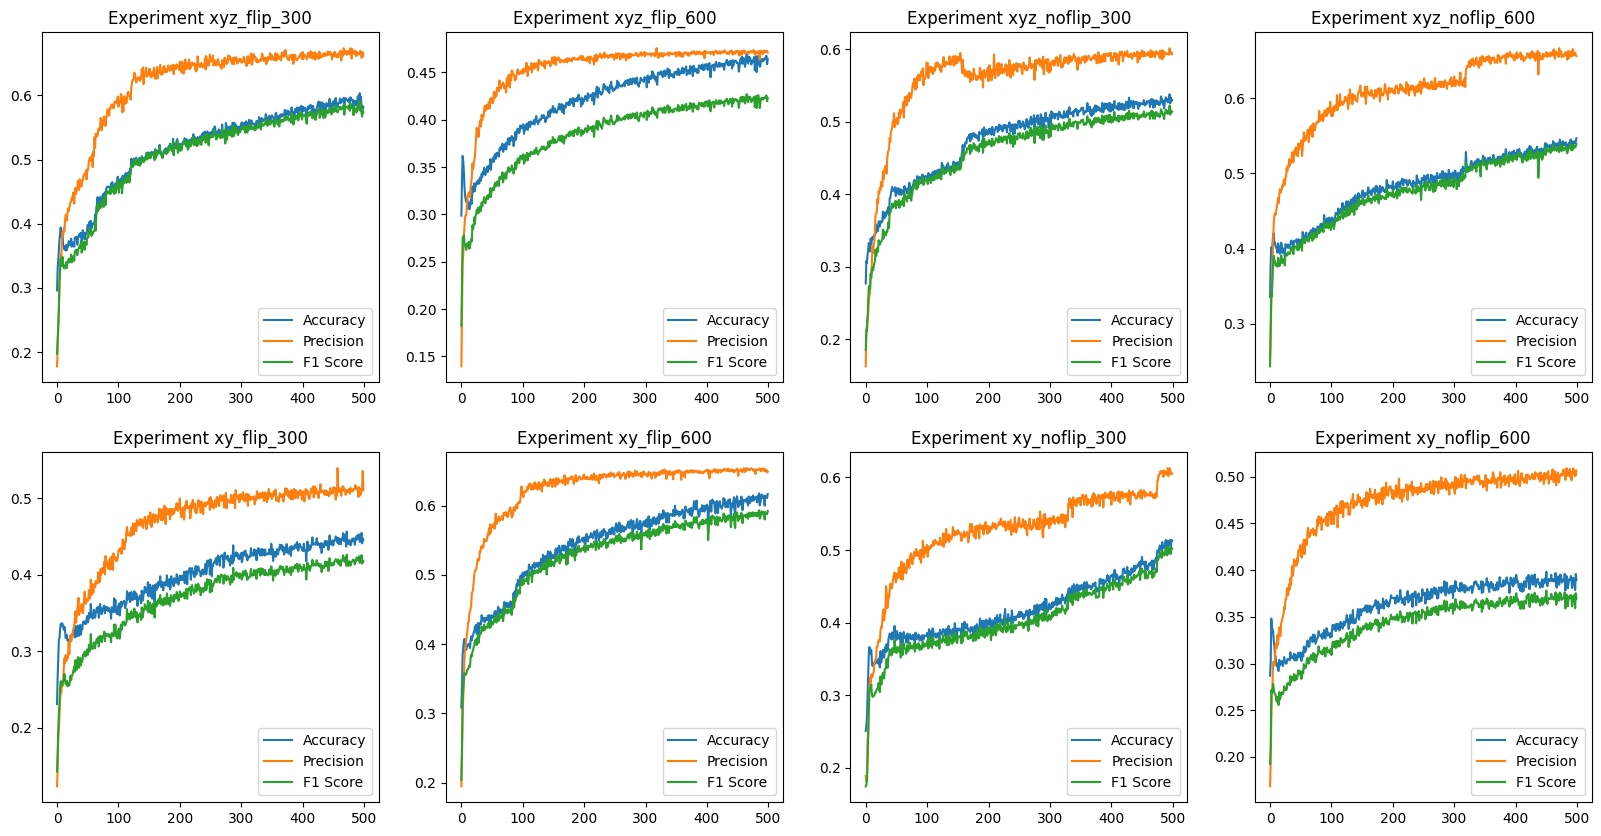

In [4]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

for k, exp in enumerate(os.listdir(RESULTS_DIR)):
    i, j = divmod(k, 4)
    metrics = np.load(RESULTS_DIR / exp / "metrics.npy", allow_pickle=True)

    metric_names = metrics[0].keys()

    for name in metric_names:
        if name == "Recall":
            continue
        runs_mean = np.array([d[name] for d in metrics]).mean(axis=0)
        ax[i, j].plot(np.arange(500), runs_mean, label=name)

    ax[i, j].set_title(f"Experiment {exp}")
    ax[i, j].legend()

plt.savefig("metrics_vis.svg")
plt.show()

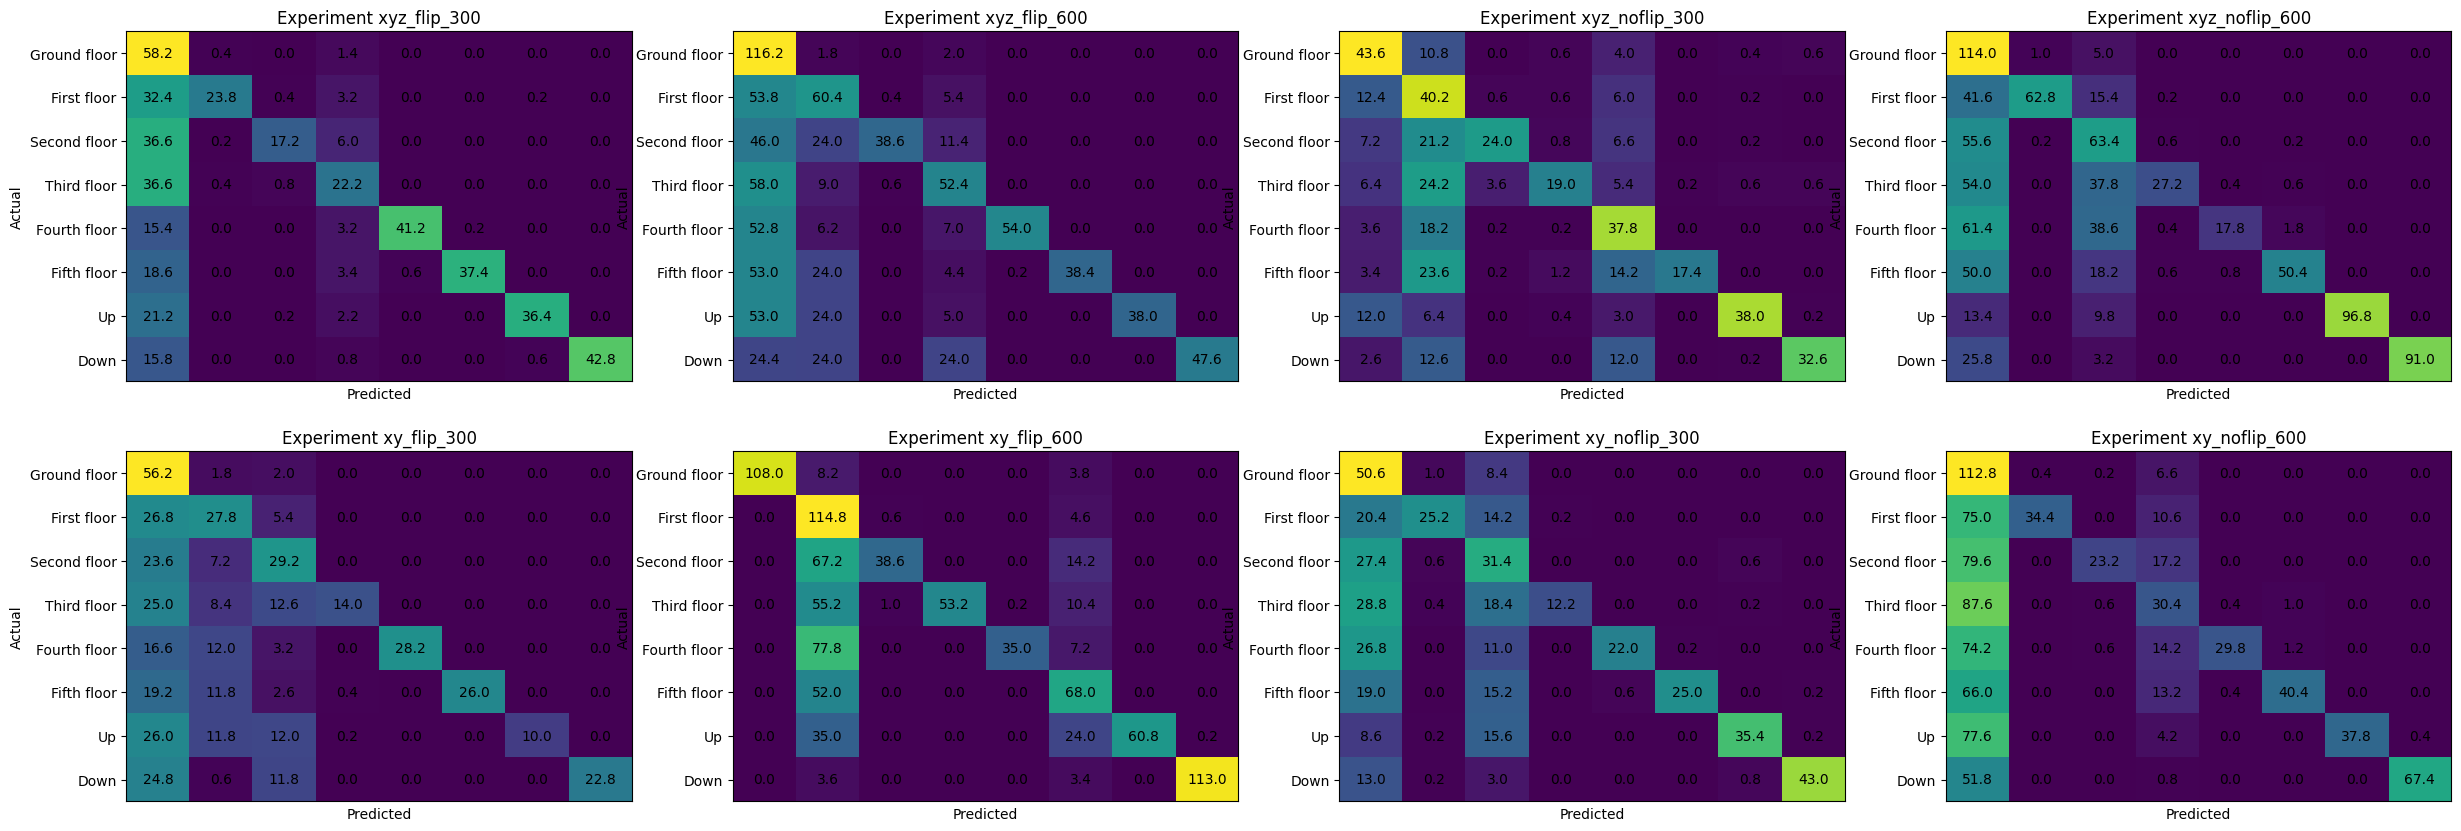

In [5]:
conf_mats = []

for exp in os.listdir(RESULTS_DIR):
    conf_mat = np.load(RESULTS_DIR / exp / "cms.npy", allow_pickle=True)
    conf_mats.append((conf_mat.mean(axis=0), f"Experiment {exp}"))

plot_confusion_matrix(conf_mats)

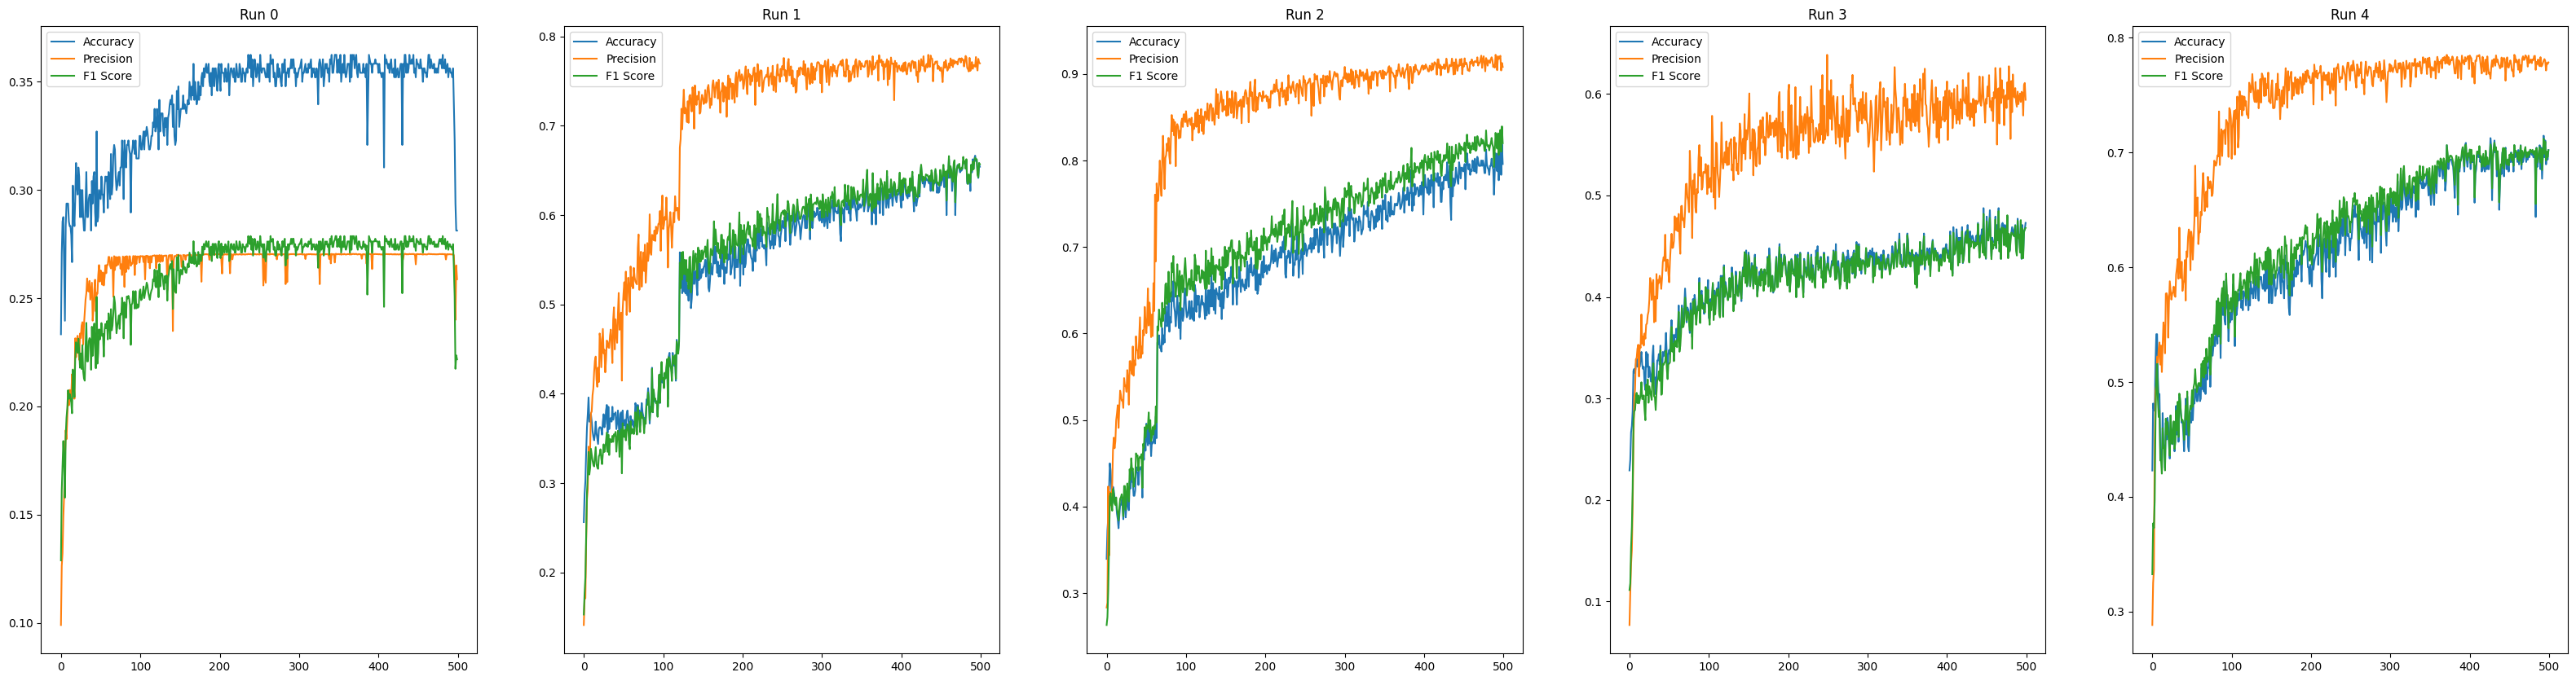

In [6]:
fig, ax = plt.subplots(1, 5, figsize=(40, 10))
metrics = np.load(RESULTS_DIR / "xyz_flip_300" / "metrics.npy", allow_pickle=True)

for i in range(5):
    for name in metric_names:
        if name == "Recall":
            continue
        ax[i].plot(np.arange(500), metrics[i][name], label=name)

        ax[i].set_title(f"Run {i}")
        ax[i].legend()

plt.show()